In [2]:
from IMPORTS import *

seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounte

Reading ATE JSON Files

In [3]:
ATE_train = None
ATE_test = None
ATE_val = None
with open("Task1\processed\ATE_train.json") as f1:
    ATE_train  = json.load(f1)

with open("Task1\processed\ATE_test.json") as f2:
    ATE_test = json.load(f2)

with open("Task1\processed\ATE_val.json") as f3:
    ATE_val = json.load(f3)


Reading NER JSON Files

In [4]:
NER_train = None
NER_test = None
NER_val = None
with open("Task1\processed\\NER_train.json") as f1:
    NER_train  = json.load(f1)

with open("Task1\processed\\NER_test.json") as f2:
    NER_test = json.load(f2)

with open("Task1\processed\\NER_val.json") as f3:
    NER_val = json.load(f3)


ATE_Dataset

In [5]:
X_train_ate,Y_train_ate= create_train_test_val(ATE_train)
X_test_ate,Y_test_ate = create_train_test_val(ATE_test)
X_val_ate,Y_val_ate = create_train_test_val(ATE_val)


In [6]:
s=set()
for i in Y_test_ate:
    s.update(set(i))
s

{'B', 'I', 'O'}

NER_Dataset

In [8]:
X_train_ner,Y_train_ner = create_train_test_val(NER_train)
X_test_ner,Y_test_ner = create_train_test_val(NER_test)
X_val_ner,Y_val_ner = create_train_test_val(NER_val)


Loading Word2Vec

In [10]:
word2vec = KeyedVectors.load_word2vec_format('WordEmbeddings/Word2Vec.bin',binary=True)

Tokenizing

In [11]:

X_train_ate_tokenized, toke = TokenCreator(X_train_ate,1)
X_test_ate_tokenized = TokenCreator(X_test_ate,0,tokenizer = toke)
X_val_ate_tokenized = TokenCreator(X_val_ate,0,tokenizer = toke)

Y_train_ate_tokenized,toke2 = TokenCreator(Y_train_ate,0)
Y_test_ate_tokenized = TokenCreator(Y_test_ate,0,tokenizer = toke2)
Y_val_ate_tokenized = TokenCreator(Y_val_ate,0,tokenizer = toke2)

print(X_val_ate_tokenized)


[[19, 2, 2026, 4, 355, 458, 33, 1, 19, 10, 1, 1, 1, 132, 31, 16, 86, 165, 306, 76, 2, 1391, 907, 383, 16, 104, 6, 4, 80, 6, 321, 4, 649, 2, 1, 5, 25, 6, 42, 22, 1, 1, 37, 3], [17, 29, 900, 161, 1, 5, 56, 110, 9, 27, 41], [621, 848, 2212, 23, 2, 784, 2303, 580, 2, 87, 53, 5, 2, 24, 1699, 266, 3], [2, 374, 14, 16, 55, 641, 207, 196, 2348, 21, 46, 10, 343, 1, 2, 325, 11, 17, 121, 3], [6, 1087, 105, 5, 48, 6, 91, 6, 43, 869, 223, 3], [6, 43, 31, 95, 356, 7, 441, 305, 2, 190, 87, 4, 7, 245, 622, 4, 5, 6, 174, 10, 183, 316, 41], [8, 114, 177, 2, 269, 757, 274, 262, 9, 71, 3], [2, 34, 54, 369, 7, 38, 22, 71, 4, 5, 26, 35, 81, 346, 13, 6, 3], [1, 21, 2, 1047, 125, 2222, 23, 8, 108, 20, 771, 19, 662, 394, 1090, 1, 3], [61, 76, 10, 287, 8, 489, 189, 6, 117, 5, 18, 453, 14, 2, 333, 35, 408, 5, 31, 28, 416, 10, 94, 333, 3], [6, 18, 223, 4, 1720, 53, 4, 5, 44, 35, 335, 166, 61, 51, 265, 141, 41], [341, 4, 2, 24, 18, 244, 463, 4, 208, 501, 57, 2, 506, 29, 4, 5, 18, 263, 1, 1, 19, 25, 3], [63, 9, 27,

In [12]:
# X_train_ner_tokenized, toke = TokenCreator(X_train_ner,1)
# X_test_ner_tokenized = TokenCreator(X_test_ner,0,tokenizer = toke)
# X_val_ner_tokenized = TokenCreator(X_val_ner,0,tokenizer = toke)

# Y_train_ner_tokenized,toke2 = TokenCreator(Y_train_ner,0)
# Y_test_ner_tokenized = TokenCreator(Y_test_ner,0,tokenizer = toke2)
# Y_val_ner_tokenized = TokenCreator(Y_val_ner,0,tokenizer = toke2)

# print(X_val_ner_tokenized)

[[284, 1, 248, 6, 555, 625, 70, 557, 36, 1, 4, 106, 1782, 3, 2, 2739, 145, 3, 474], [2, 42, 101, 15, 48, 5, 15, 2503, 83, 2, 72, 276, 289, 14, 3950, 2, 277, 984, 13, 8, 339, 9, 5, 272, 16, 4504, 12, 126, 5, 386, 33, 8136, 23, 27, 9, 18, 2556, 4186, 4404, 64, 27, 9, 18, 8, 1508], [3209, 130, 1, 2930, 377, 4457, 57, 9, 566, 8, 560, 3, 2, 2276, 303, 13, 1, 9114, 2, 620, 3, 2, 319, 153, 18, 272, 43, 900, 9008], [2, 342, 3, 3301, 131, 8, 410, 11, 2, 77, 24, 2, 1, 2, 1, 27439, 26, 1, 6, 8217, 2, 388, 1002, 7125, 2079, 2, 1142, 648, 706, 10, 7393, 14, 10283, 3822], [16, 10, 366, 7, 2, 388, 567, 565, 1, 7426, 1, 1, 9, 2027, 24, 2, 65, 811, 4, 2, 348, 3, 18422, 14, 2, 278, 1, 5, 1, 341, 676, 1], [8, 388, 9, 5334, 6, 2, 919, 542, 9, 487, 14, 5842, 4632], [590, 20, 730, 129, 3, 2, 646, 890, 81, 1, 13, 39, 4, 730, 129, 3, 2, 646, 890, 81, 2404, 860, 123, 5, 13, 2, 1, 13, 3163, 1, 1, 19, 31, 30169], [47, 660, 521, 3145, 568, 19, 1, 12, 2, 60, 753, 7, 47, 176, 17, 19, 52, 8, 1207, 25636, 1, 3, 1239,

Forming the vocabulary


In [14]:
st1 = find_vocab(X_train_ate_tokenized)
vocab_size_ate  = len(st1) + 1 
vocab_size_ate

2406

In [15]:
# st2 = find_vocab(X_train_ner_tokenized)
# vocab_size_ner = len(st2) + 1
# vocab_size_ner

30220

Initializing weights

In [16]:
weights_ate = np.zeros((vocab_size_ate, 300))

mapping_ate = toke.word_index 
mapping_ate

{'#UK': 1,
 'the': 2,
 'of': 3,
 'in': 4,
 'to': 5,
 'and': 6,
 'that': 7,
 'a': 8,
 'was': 9,
 'is': 10,
 'by': 11,
 'on': 12,
 'as': 13,
 'for': 14,
 'be': 15,
 'it': 16,
 'court': 17,
 'not': 18,
 'has': 19,
 'under': 20,
 'this': 21,
 'section': 22,
 'which': 23,
 'with': 24,
 'or': 25,
 'at': 26,
 'he': 27,
 'case': 28,
 'no.': 29,
 'from': 30,
 'been': 31,
 'his': 32,
 'an': 33,
 'had': 34,
 'are': 35,
 'were': 36,
 'v.': 37,
 'state': 38,
 'also': 39,
 'have': 40,
 'act': 41,
 'order': 42,
 'any': 43,
 'no': 44,
 'high': 45,
 'accused': 46,
 'learned': 47,
 'said': 48,
 'there': 49,
 'dated': 50,
 'supreme': 51,
 'made': 52,
 'would': 53,
 'before': 54,
 'singh': 55,
 'held': 56,
 'who': 57,
 'such': 58,
 'against': 59,
 'other': 60,
 'but': 61,
 'their': 62,
 'one': 63,
 'if': 64,
 'respondent': 65,
 'filed': 66,
 'appeal': 67,
 'appellant': 68,
 'evidence': 69,
 '&': 70,
 'all': 71,
 'only': 72,
 'decision': 73,
 'after': 74,
 'we': 75,
 'they': 76,
 'petitioner': 77,
 'govern

In [17]:
# weights_ner = np.zeros((vocab_size_ner, 300))

# mapping_ner = toke.word_index 
# mapping_ner

{'#UK': 1,
 'the': 2,
 'of': 3,
 'in': 4,
 'to': 5,
 'and': 6,
 'that': 7,
 'a': 8,
 'was': 9,
 'is': 10,
 'by': 11,
 'on': 12,
 'as': 13,
 'for': 14,
 'be': 15,
 'it': 16,
 'court': 17,
 'not': 18,
 'has': 19,
 'under': 20,
 'this': 21,
 'section': 22,
 'which': 23,
 'with': 24,
 'or': 25,
 'at': 26,
 'he': 27,
 'case': 28,
 'no.': 29,
 'from': 30,
 'been': 31,
 'his': 32,
 'an': 33,
 'had': 34,
 'are': 35,
 'were': 36,
 'v.': 37,
 'state': 38,
 'also': 39,
 'have': 40,
 'act': 41,
 'order': 42,
 'any': 43,
 'no': 44,
 'high': 45,
 'accused': 46,
 'learned': 47,
 'said': 48,
 'there': 49,
 'dated': 50,
 'supreme': 51,
 'made': 52,
 'would': 53,
 'before': 54,
 'singh': 55,
 'held': 56,
 'who': 57,
 'such': 58,
 'against': 59,
 'other': 60,
 'but': 61,
 'their': 62,
 'one': 63,
 'if': 64,
 'respondent': 65,
 'filed': 66,
 'appeal': 67,
 'appellant': 68,
 'evidence': 69,
 '&': 70,
 'all': 71,
 'only': 72,
 'decision': 73,
 'after': 74,
 'we': 75,
 'they': 76,
 'petitioner': 77,
 'govern

Creating weights.

In [18]:
for word, index in mapping_ate.items():
    if word in word2vec:
        weights_ate[index:] = word2vec[word]
        

In [19]:
# for word, index in mapping_ner.items():
#     if word in word2vec:
#         weights_ner[index:] = word2vec[word]

Padding the datasets.

In [20]:
X_padded_train = pad_sequences(X_train_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_train = pad_sequences(Y_train_ate_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_test = pad_sequences(X_test_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_test = pad_sequences(Y_test_ate_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_val = pad_sequences(X_val_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_val = pad_sequences(Y_val_ate_tokenized, maxlen=100, padding="pre", truncating="post")        

In [21]:
# X_padded_train_ner = pad_sequences(X_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")
# Y_padded_train_ner = pad_sequences(Y_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")

# X_padded_test_ner = pad_sequences(X_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")
# Y_padded_test_ner = pad_sequences(Y_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")

# X_padded_val_ner = pad_sequences(X_val_ner_tokenized, maxlen=100, padding="pre", truncating="post")
# Y_padded_val_ner = pad_sequences(Y_val_ner_tokenized, maxlen=100, padding="pre", truncating="post")  

One-hot encoding the labels.

In [22]:
Y_padded_train = to_categorical(Y_padded_train)
Y_padded_test = to_categorical(Y_padded_test)
Y_padded_val = to_categorical(Y_padded_val)

print(Y_padded_train.shape)
print(X_padded_train.shape)


(906, 100, 4)
(906, 100)


In [23]:
# Y_padded_train_ner = to_categorical(Y_padded_train_ner)
# Y_padded_test_ner = to_categorical(Y_padded_test_ner)
# Y_padded_val_ner = to_categorical(Y_padded_val_ner)

# print(Y_padded_train_ner.shape)
# print(X_padded_train_ner.shape)

(8019, 100, 28)
(8019, 100)


<a href="https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/"> Reference </a>

BILSTM-CRF Model

ATE

In [34]:
input=Input(shape=(100,))
BiLSTM_CRF_embed=Embedding(input_dim=vocab_size_ate, output_dim=300, input_length=100, weights=[weights_ate], trainable=False)(input)
BiLSTM_CRF_bilstm=Bidirectional(LSTM(units=128, return_sequences=True, recurrent_dropout=0.1))(BiLSTM_CRF_embed)
BiLSTM_CRF_model=(TimeDistributed(Dense(Y_padded_test.shape[2], activation='relu')))(BiLSTM_CRF_bilstm)

crf = CRF(Y_padded_test.shape[2])
predicted_sequence, potentials, sequence_length, crf_kernel = crf(BiLSTM_CRF_model)
# out=crf(BiLSTM_CRF_model3)
# BiLSTM_CRF_model.add(crf)
# gru_model.add(TimeDistributed(Dense(Y_padded_train.shape[2], activation='softmax')))
BiLSTM_CRF_model=Model(input,potentials)

In [35]:
BiLSTM_CRF_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 300)          721800    
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 256)          439296    
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 100, 4)            1028      
 stributed)                                                      
                                                                 
 crf_1 (CRF)                 [(None, 100),             44        
                              (None, 100, 4),                    
                              (None,),                     

In [36]:
BiLSTM_CRF_model.compile(
        optimizer=AdamW(weight_decay=0.001),
        loss=SigmoidFocalCrossEntropy(),
        metrics=['accuracy']
    )

In [37]:
BiLSTM_CRF_f1_callback_val = F1ScoreCallback(data=(X_padded_val, Y_padded_val),name='valindation')
BiLSTM_CRF_f1_callback_train=F1ScoreCallback(data=(X_padded_train, Y_padded_train),name='training')

Training the GRU Model

In [38]:
BiLSTM_CRF_training = BiLSTM_CRF_model.fit(X_padded_train, Y_padded_train, batch_size=128, epochs=10, validation_data=(X_padded_val, Y_padded_val), callbacks=[BiLSTM_CRF_f1_callback_val,BiLSTM_CRF_f1_callback_train])

Epoch 1/10
7/7 [==============================] - 1s 45ms/stepss: 1.1023 - accuracy
valindation F1 Score: 0.7465460896492004
29/29 [==============================] - 1s 32ms/step
training F1 Score: 0.7571574449539185
8/8 [==============================] - 13s 1s/step - loss: 1.1023 - accuracy: 0.8783 - val_loss: 0.5152 - val_accuracy: 0.9748
Epoch 2/10
7/7 [==============================] - 0s 39ms/stepss: 0.4155 - accuracy
valindation F1 Score: 0.254664808511734
29/29 [==============================] - 1s 39ms/step
training F1 Score: 0.31424832344055176
8/8 [==============================] - 6s 758ms/step - loss: 0.4155 - accuracy: 0.9717 - val_loss: 0.4939 - val_accuracy: 0.9226
Epoch 3/10
7/7 [==============================] - 0s 41ms/stepss: 0.1857 - accuracy
valindation F1 Score: 0.8435766100883484
29/29 [==============================] - 1s 42ms/step
training F1 Score: 0.8160368204116821
8/8 [==============================] - 6s 794ms/step - loss: 0.1857 - accuracy: 0.9671 - val_

In [39]:
accuracy = BiLSTM_CRF_model.evaluate(X_padded_test, Y_padded_test, verbose = 1)
print(accuracy)

11/11 [==============================] - 0s 35ms/step - loss: 0.0396 - accuracy: 0.9779
[0.03963002935051918, 0.9778658747673035]


Graphs

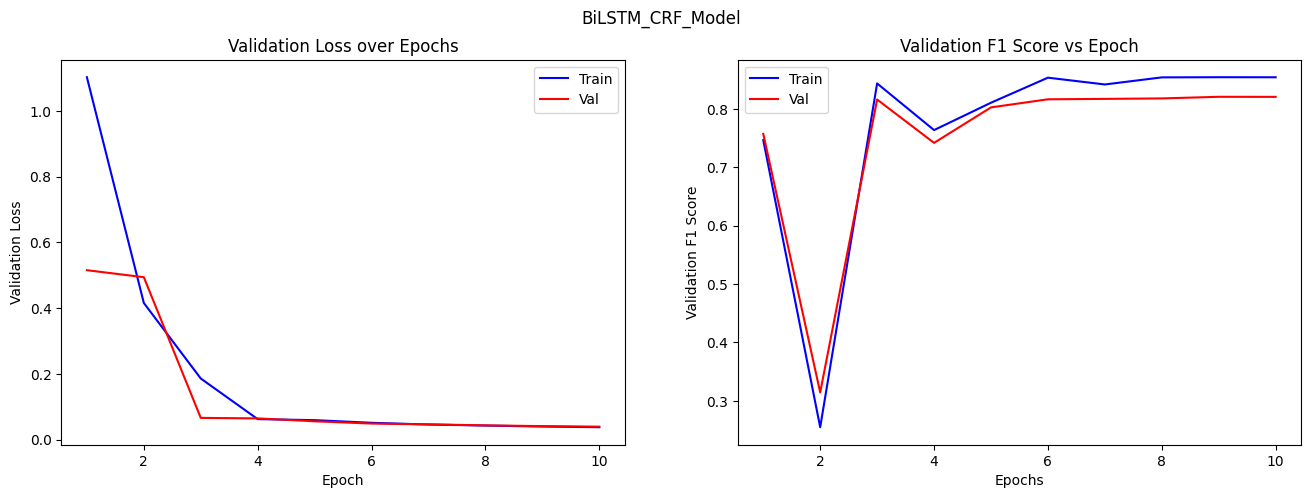

In [41]:
model_name="BiLSTM_CRF"
Embedding="word2vec"
draw_loss_graph(BiLSTM_CRF_training, f"{model_name}_Model", BiLSTM_CRF_f1_callback_val.f1_scores, BiLSTM_CRF_f1_callback_train.f1_scores)
save_model(BiLSTM_CRF_model, model_name,Embedding,"t2")
loaded_model = load_model(f"Saved_Models/t2_{model_name}_{Embedding}.pkl")